#  ☆ The Super-Stars of Video Games  ☆
##### Erica Lee   |   INFO 2201   |   18 December 2019   |   Final Project

In [82]:
import requests
import pprint
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
sb.set_style("whitegrid")

# SB.CATPLOT LEGEND

In [ ]:
# since i made a lot of charts, this is the legend for the parameters that were passed through sb.catplot

# x=: what column to plot on the x axis
# y=: what column to plot on the y axis
# data=: what DataFrame to pull the data from
# hue=: group data in that row into categories (instead of separately)
# size=: the height of the graph
# aspect=: the width of the graph
# palette=: the color palette for the graph's data
# kind=: the type of chart

# methods:
# .set_xticklabels(rotation=90) rotates the labels on the x axis by 90 degrees
# .set(title="") sets the title for the chart
# .set(ylim=(),xlim=()) toggle the x and y axis ranges

# found most of the parameters we didn't learn in class at:
# https://seaborn.pydata.org/generated/seaborn.catplot.html

# DATA SOURCE 1: VGSales.csv

In [2]:
VGSalesDF = pd.read_csv("VGSales.csv") # read in the CSV file into a DataFrame using Pandas
VGSalesDF

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


### Top 500 Games between 2004 and 2008

In [3]:
top500Games = VGSalesDF.query("Year <= 2008 and Year >= 2004").sort_values("Critic_Score",ascending=False).head(647)
# use the .query method to find rows where the year is under 2008 and above 2004
# sort them by the values in the Critic_Score column, ascending=False means it's sorted high to low
# i did .head(647) because after the dropped duplicates, that was number that got the first 500.

top500Games.drop_duplicates(subset="Name",keep="first",inplace=True)
# since there are duplicates, use the .drop_duplicates method (found on stackoverflow)
# subset="Name" refers to what column to look at
# keep="first" skips the first instance an item it's seen
# inplace=True deletes the row if it is a duplicate

top500Games

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
79,80,Grand Theft Auto IV,grand-theft-auto-iv,Action,M,PS3,Rockstar Games,Rockstar North,NaN,10.0,...,4.79,3.73,0.44,1.62,2008.0,NaN,http://www.vgchartz.com/game/7102/grand-theft-...,1,9.0,/games/boxart/full_1729769AmericaFrontccc.jpg
10739,10740,The Orange Box,the-orange-box,Shooter,T,PC,Electronic Arts,Valve Software,NaN,9.7,...,NaN,0.11,NaN,0.02,2007.0,NaN,http://www.vgchartz.com/game/7663/the-orange-b...,1,NaN,/games/boxart/4802197ccc.jpg
57,58,Super Mario Galaxy,super-mario-galaxy,Platform,E,Wii,Nintendo,Nintendo EAD Tokyo,NaN,9.7,...,NaN,NaN,NaN,NaN,2007.0,NaN,http://www.vgchartz.com/game/6963/super-mario-...,1,9.6,/games/boxart/full_5542974AmericaFrontccc.jpg
103,104,Half-Life 2,half-life-2,Shooter,M,PC,VU Games,Valve Software,NaN,9.7,...,NaN,NaN,NaN,NaN,2004.0,NaN,http://www.vgchartz.com/game/7279/half-life-2/...,1,NaN,/games/boxart/6354662ccc.jpg
621,622,BioShock,bioshock,Shooter,M,X360,2K Games,2K Australia / 2K Boston,NaN,9.6,...,1.65,0.85,0.05,0.28,2007.0,NaN,http://www.vgchartz.com/game/7023/bioshock/?re...,1,9.3,/games/boxart/full_9365862AmericaFrontccc.jpg
835,836,Resident Evil 4,resident-evil-4,Action,M,PS2,Capcom,Capcom Production Studio 4,NaN,9.6,...,NaN,NaN,NaN,NaN,2005.0,NaN,http://www.vgchartz.com/game/4162/resident-evi...,1,NaN,/games/boxart/full_9190363AmericaFrontccc.jpg
43,44,Halo 3,halo-3,Shooter,M,X360,Microsoft Game Studios,Bungie Studios,NaN,9.6,...,NaN,NaN,NaN,NaN,2007.0,11th Oct 18,http://www.vgchartz.com/game/6964/halo-3/?regi...,1,8.8,/games/boxart/full_8373567AmericaFrontccc.jpg
94,95,Call of Duty 4: Modern Warfare,call-of-duty-4-modern-warfare,Shooter,M,X360,Activision,Infinity Ward,NaN,9.6,...,5.98,2.39,0.13,0.91,2007.0,NaN,http://www.vgchartz.com/game/7316/call-of-duty...,1,NaN,/games/boxart/full_4481633AmericaFrontccc.jpg
122,123,Halo 2,halo-2,Shooter,M,XB,Microsoft Game Studios,Bungie Studios,NaN,9.6,...,NaN,NaN,NaN,NaN,2004.0,11th Oct 18,http://www.vgchartz.com/game/940/halo-2/?regio...,1,NaN,/games/boxart/2840502ccc.jpg
136,137,The Legend of Zelda: Twilight Princess,the-legend-of-zelda-twilight-princess,Adventure,T,Wii,Nintendo,Nintendo EAD,NaN,9.5,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/4573/the-legend-o...,1,9.3,/games/boxart/full_2379938AmericaFrontccc.jpg


### Count of Top 500 Highest Rated Games by Year

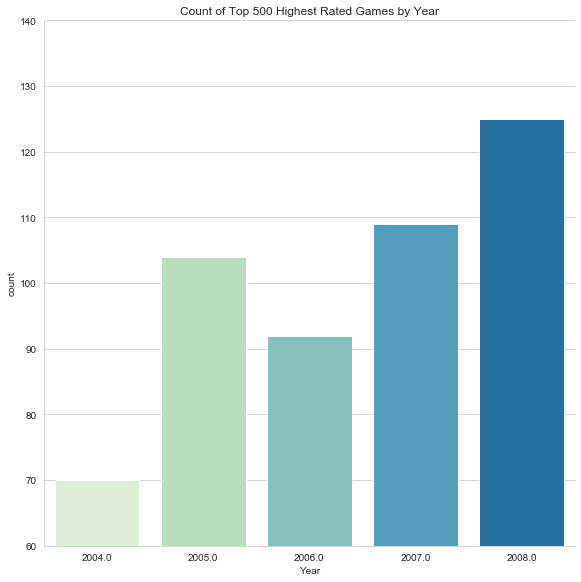

In [96]:
sb.catplot(x="Year",y=None,data=top500Games,size=8,palette="GnBu",
           kind="count").set(title="Count of Top 500 Highest Rated Games by Year",
                                                         ylim=(60,140))

### Count of Top 500 Rated Games by Genre

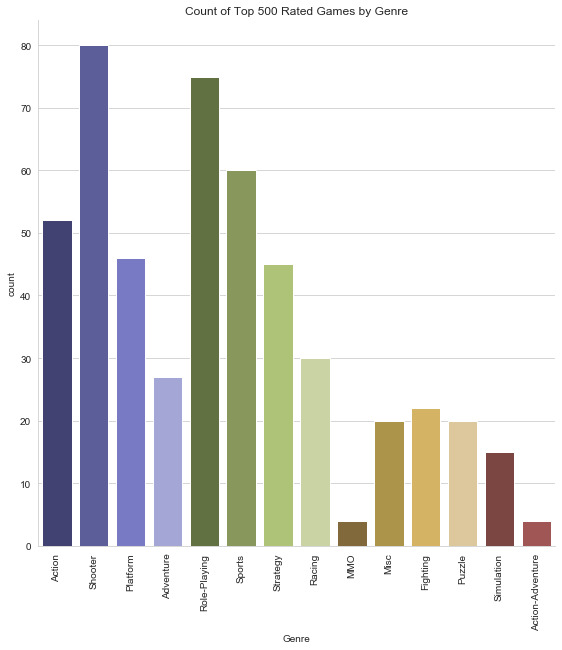

In [6]:
sb.catplot(x="Genre",y=None,data=top500Games,kind="count",palette="tab20b",
           size=8).set_xticklabels(rotation=90).set(title="Count of Top 500 Rated Games by Genre")

### Count of Top 500 Rated Games by Platform

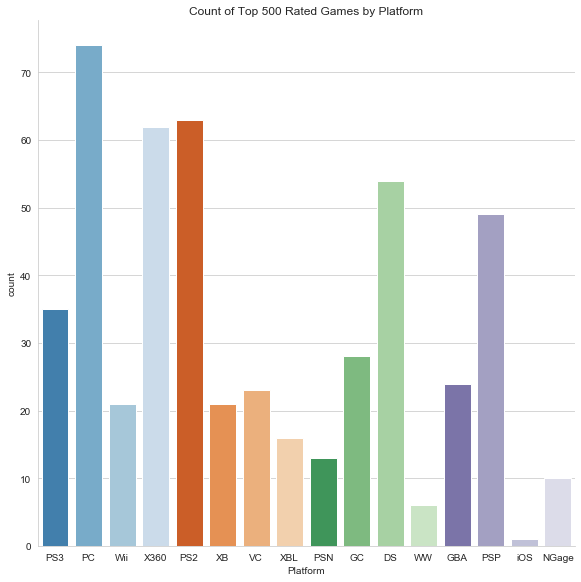

In [7]:
sb.catplot(x="Platform",y=None,data=top500Games,size=8,palette="tab20c",
           kind="count").set(title="Count of Top 500 Rated Games by Platform")

### Dataframe for Games Released Between 2004-2010 & 9.5+ Critic Score

In [9]:
topGamesDF1 = VGSalesDF[["Name","Publisher","Genre","Year","Critic_Score","Platform"]]
# make new DataFrame called topGamesDF1, and only pull the columns named

topGamesDF1

,Name,Publisher,Genre,Year,Critic_Score,Platform
0,Wii Sports,Nintendo,Sports,2006.0,7.7,Wii
1,Super Mario Bros.,Nintendo,Platform,1985.0,10.0,NES
2,Mario Kart Wii,Nintendo,Racing,2008.0,8.2,Wii
3,PlayerUnknown's Battlegrounds,PUBG Corporation,Shooter,2017.0,NaN,PC
4,Wii Sports Resort,Nintendo,Sports,2009.0,8.0,Wii
5,Pokemon Red / Green / Blue Version,Nintendo,Role-Playing,1998.0,9.4,GB
6,New Super Mario Bros.,Nintendo,Platform,2006.0,9.1,DS
7,Tetris,Nintendo,Puzzle,1989.0,NaN,GB
8,New Super Mario Bros. Wii,Nintendo,Platform,2009.0,8.6,Wii
9,Minecraft,Mojang,Misc,2010.0,10.0,PC


In [97]:
topGamesDF2 = topGamesDF1.query("Year >= 2004 and Year <= 2008 and Critic_Score >= 9.5").sort_values("Critic_Score",
                                                                                                     ascending=False)
# use the .query method to find the rows where the year is above or equal to 2004, but below or equal to 2008,
# and where the critic score is above or equal to 9.5
# then use .sort_values method to sort by critic score, high to low

topGamesDF2.drop_duplicates(subset="Name",keep="first",inplace=True)
# use the .drop_duplicates method to remove any duplicate rows
# subset="Names" means to look for duplicate items in that column
# keep="first" will keep the first instance but delete anything after that

topGamesDF2

,Name,Publisher,Genre,Year,Critic_Score,Platform
73,Grand Theft Auto IV,Rockstar Games,Action,2008.0,10.0,X360
57,Super Mario Galaxy,Nintendo,Platform,2007.0,9.7,Wii
103,Half-Life 2,VU Games,Shooter,2004.0,9.7,PC
1142,The Orange Box,Electronic Arts,Shooter,2007.0,9.7,X360
621,BioShock,2K Games,Shooter,2007.0,9.6,X360
43,Halo 3,Microsoft Game Studios,Shooter,2007.0,9.6,X360
1360,Resident Evil 4,Capcom,Action,2005.0,9.6,GC
122,Halo 2,Microsoft Game Studios,Shooter,2004.0,9.6,XB
94,Call of Duty 4: Modern Warfare,Activision,Shooter,2007.0,9.6,X360
37442,Mega Man 2,Capcom,Platform,2008.0,9.5,VC


In [11]:
topGamesDF = topGamesDF2.drop([103,48499,46924,46912,37442])
# manually dropped some of these games because they were remakes on virtual console (all of the games
# released on VC platform are re-releases of very, very old games)
# or were part of another game on the list (half-life 2 is included in the orange box)

topGamesDF

,Name,Publisher,Genre,Year,Critic_Score,Platform
73,Grand Theft Auto IV,Rockstar Games,Action,2008.0,10.0,X360
57,Super Mario Galaxy,Nintendo,Platform,2007.0,9.7,Wii
1142,The Orange Box,Electronic Arts,Shooter,2007.0,9.7,X360
621,BioShock,2K Games,Shooter,2007.0,9.6,X360
43,Halo 3,Microsoft Game Studios,Shooter,2007.0,9.6,X360
1360,Resident Evil 4,Capcom,Action,2005.0,9.6,GC
122,Halo 2,Microsoft Game Studios,Shooter,2004.0,9.6,XB
94,Call of Duty 4: Modern Warfare,Activision,Shooter,2007.0,9.6,X360
12740,Ninja Gaiden Black,Tecmo,Action,2005.0,9.5,XB
26,Grand Theft Auto: San Andreas,Rockstar Games,Action,2004.0,9.5,PS2


In [98]:
top5GamesDF = topGamesDF.drop([43,1360,122,94,12740,26,298])
# manually drop the games that were not also included in the other list of top games (otherTopGamesDF) below

top5GamesDF

,Name,Publisher,Genre,Year,Critic_Score,Platform
73,Grand Theft Auto IV,Rockstar Games,Action,2008.0,10.0,X360
57,Super Mario Galaxy,Nintendo,Platform,2007.0,9.7,Wii
1142,The Orange Box,Electronic Arts,Shooter,2007.0,9.7,X360
621,BioShock,2K Games,Shooter,2007.0,9.6,X360
1579,The Legend of Zelda: Twilight Princess,Nintendo,Adventure,2006.0,9.5,GC


# DATA SOURCE 2: video_games.csv 

In [13]:
video_GameDF = pd.read_csv("video_games.csv")
video_GameDF.drop_duplicates(subset="Title",keep="first",inplace=True)
video_GameDF

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
5,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,...,20.833333,25.200000,20.000000,3,16.450000,15.500000,15.750000,15.500000,2,15.250000
6,Ridge Racer,True,1,True,True,Racing / Driving,True,Namco,True,88,...,0.883333,0.933333,0.883333,2,0.833333,0.616667,0.783333,0.533333,3,0.450000
7,Metal Gear Ac!d,True,1,True,True,Strategy,True,Konami,True,75,...,24.833333,27.483333,25.100000,6,21.916667,20.700000,23.600000,20.783333,11,17.883333
8,Madden NFL 2005,True,1,True,True,Sports,True,EA,True,68,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
9,Pokmon Dash,True,1,True,True,Racing / Driving,True,Nintendo,True,46,...,0.000000,0.000000,0.000000,0,0.000000,1.116667,1.200000,1.083333,3,1.050000


In [14]:
video_GameDF.rename(columns={"Title":"Name",
                             "Release.Year":"Year",
                            "Metrics.Review Score":"Score",
                             "Metadata.Genres":"Genre",
                            "Length.All PlayStyles.Polled":"Number Completed",
                           "Metrics.Sales":"Sales",
                            "Length.All PlayStyles.Average":"Average Completion Time in Hours",
                           "Release.Console":"Platform",
                            "Metadata.Publishers":"Publisher",
                           "Length.Completionists.Polled":"Number Completed 100%",
                           "Length.Completionists.Average":"Average 100% Completion Time in Hours"},inplace=True)
# use .rename() to rename columns, this method takes a dictionary so if you specify columns= within the 
# method then you can add items to a dictionary. the key is the original name of the column and the
# value is what you want to rename it to
# inplace=True means that the original column name will be replaced by what i want to name it

In [15]:
videoGameDF = video_GameDF[["Name","Publisher","Genre","Score","Year"]].sort_values("Score",ascending=False).head(100)
# make a new DF by finding the columns i want from the original DF, sorting them by score highest to lowest,
# and only looking at the top 100 using .head(100)

videoGameDF

,Name,Publisher,Genre,Score,Year
834,Grand Theft Auto IV,Rockstar,"Action,Racing / Driving",98,2008
422,Super Mario Galaxy,Nintendo,Action,97,2007
462,The Orange Box,NaN,Action,96,2007
444,BioShock,2K,Action,96,2007
161,The Legend of Zelda: Twilight Princess,Nintendo,"Action,Role-Playing (RPG)",95,2006
844,LittleBigPlanet,Sony,Action,95,2008
420,Halo 3,Microsoft,Action,94,2007
165,The Elder Scrolls IV: Oblivion,2K,"Action,Role-Playing (RPG)",94,2006
421,Call of Duty 4: Modern Warfare,Activision,Action,94,2007
160,Gears of War,Microsoft,Action,94,2006


### Dataframe of Games with Critic Score of 95+

In [101]:
otherTopGamesDF = videoGameDF.query("Score >= 95").sort_values("Score",ascending=False)
# use .query to find games with a score higher than or equal to 95, no need to sort by year since it only
# has games between 2004-2008 in this CSV file 
# .sort_values to sort them highest to lowest by the score

otherTopGamesDF

,Name,Publisher,Genre,Score,Year
834,Grand Theft Auto IV,Rockstar,"Action,Racing / Driving",98,2008
422,Super Mario Galaxy,Nintendo,Action,97,2007
462,The Orange Box,NaN,Action,96,2007
444,BioShock,2K,Action,96,2007
161,The Legend of Zelda: Twilight Princess,Nintendo,"Action,Role-Playing (RPG)",95,2006
844,LittleBigPlanet,Sony,Action,95,2008


In [102]:
otherTop5GamesDF = otherTopGamesDF.drop([844])
# drop this game because it doesn't appear in the other DF's top games

otherTop5GamesDF
# now this DF and the top5GamesDF from the other CSV file match

,Name,Publisher,Genre,Score,Year
834,Grand Theft Auto IV,Rockstar,"Action,Racing / Driving",98,2008
422,Super Mario Galaxy,Nintendo,Action,97,2007
462,The Orange Box,NaN,Action,96,2007
444,BioShock,2K,Action,96,2007
161,The Legend of Zelda: Twilight Princess,Nintendo,"Action,Role-Playing (RPG)",95,2006


### Dataframe with Playtime Information for Top Games

In [103]:
topGamesInfoDF1 = video_GameDF[["Name","Publisher","Year","Score","Average Completion Time in Hours",
                               "Number Completed","Average 100% Completion Time in Hours",
                              "Number Completed 100%"]]
# make another dataframe that pulls the columns i want from the original DF

topGamesInfoDF = topGamesInfoDF1.query("Score >= 95").sort_values("Score",ascending=False).drop([844])
# find the games with score equal to or above 95 using the query method, sort by score highest to lowest, and
# drop the game that isn't included in the top 5

topGamesInfoDF["Completion Time Difference"] = topGamesInfoDF["Average 100% Completion Time in Hours"] - topGamesInfoDF["Average Completion Time in Hours"]
# make a new column called "Completion Time Difference" by taking the difference between the Average 100% 
# Completion time and the Average Completion Time for All Play Styles

topGamesInfoDF

,Name,Publisher,Year,Score,Average Completion Time in Hours,Number Completed,Average 100% Completion Time in Hours,Number Completed 100%,Completion Time Difference
834,Grand Theft Auto IV,Rockstar,2008,98,38.883333,824,82.95,73,44.066667
422,Super Mario Galaxy,Nintendo,2007,97,24.833333,289,44.30,61,19.466667
444,BioShock,2K,2007,96,14.666667,1900,21.75,214,7.083333
462,The Orange Box,NaN,2007,96,34.016667,33,87.50,4,53.483333
161,The Legend of Zelda: Twilight Princess,Nintendo,2006,95,45.600000,528,55.30,106,9.700000


### Average Completion Time by Category

In [72]:
np.mean(topGamesInfoDF["Average 100% Completion Time in Hours"])
# use np.mean to find the average of the values in this column, or the average of the average completion times for 
# all five games


58.36

In [71]:
np.mean(topGamesInfoDF["Average Completion Time in Hours"])
# do the same with this except with the All Play Styles completion times

31.6

### Completion Time for All Play Styles (Top Games)

In [62]:
allPlayStylesInfo = topGamesInfoDF[["Name","Publisher","Score","Average Completion Time in Hours","Number Completed"]]
# make a DF for only the completion time statistics for All Play Styles

allPlayStylesInfo

,Name,Publisher,Score,Average Completion Time in Hours,Number Completed
834,Grand Theft Auto IV,Rockstar,98,38.883333,824
422,Super Mario Galaxy,Nintendo,97,24.833333,289
444,BioShock,2K,96,14.666667,1900
462,The Orange Box,NaN,96,34.016667,33
161,The Legend of Zelda: Twilight Princess,Nintendo,95,45.600000,528


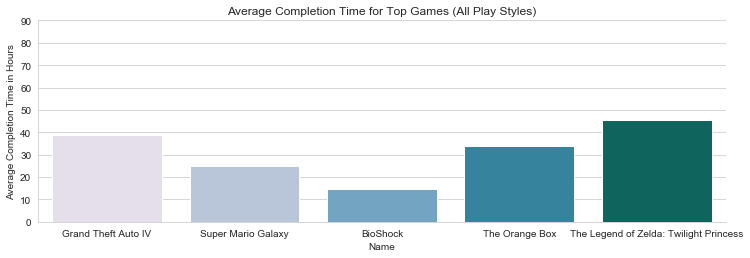

In [68]:
sb.catplot(x="Name",y="Average Completion Time in Hours",kind="bar",height=3.5,aspect=3,
           data=allPlayStylesInfo,palette="PuBuGn").set(title="Average Completion Time for Top Games (All Play Styles)",
                                                                                    ylim=(0,90))

### Completion Time for Completionists (Top Games)

In [64]:
completionistsInfo = topGamesInfoDF[["Name","Publisher","Score",
                                     "Average 100% Completion Time in Hours","Number Completed 100%"]]
# do the same, make a DF for the information for the Completionists style only

completionistsInfo

,Name,Publisher,Score,Average 100% Completion Time in Hours,Number Completed 100%
834,Grand Theft Auto IV,Rockstar,98,82.95,73
422,Super Mario Galaxy,Nintendo,97,44.30,61
444,BioShock,2K,96,21.75,214
462,The Orange Box,NaN,96,87.50,4
161,The Legend of Zelda: Twilight Princess,Nintendo,95,55.30,106


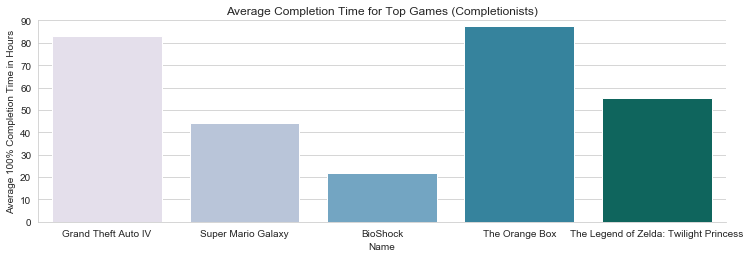

In [67]:
sb.catplot(x="Name",y="Average 100% Completion Time in Hours",kind="bar",height=3.5,aspect=3,
           data=completionistsInfo,palette="PuBuGn").set(title="Average Completion Time for Top Games (Completionists)",
                                                        ylim=(0,90))

# DATA SOURCE 3: RAWG API

In [22]:
exampleRequest = requests.get("https://api.rawg.io/api/games/goat-simulator").json()
pprint.pprint(exampleRequest)

{'achievements_count': 483,
 'added': 2593,
 'added_by_status': {'beaten': 162,
                     'dropped': 232,
                     'owned': 2121,
                     'playing': 16,
                     'toplay': 11,
                     'yet': 51},
 'additions_count': 1,
 'alternative_names': [],
 'background_image': 'https://media.rawg.io/media/games/a44/a444a7628bdb49b24d06a7672f805814.jpg',
 'background_image_additional': 'https://media.rawg.io/media/screenshots/24e/24edfe89c21accdd0b94ebda9b5c429a.jpg',
 'clip': {'clip': 'https://media.rawg.io/media/stories-640/656/65696286d0c1c3fed6200d14065ff245.mp4',
          'clips': {'320': 'https://media.rawg.io/media/stories-320/073/07318e807e0186e5e78b541a72e3a502.mp4',
                    '640': 'https://media.rawg.io/media/stories-640/656/65696286d0c1c3fed6200d14065ff245.mp4',
                    'full': 'https://media.rawg.io/media/stories/27d/27d9612d4a374537a6ba3d5248385475.mp4'},
          'preview': 'https://media.rawg.io/me

In [104]:
def gameInfo(gameName): # make a function that takes a game name as a parameter
    gameQuery = requests.get("https://api.rawg.io/api/games/"+str(gameName)).json()
    # the api's endpoint is found using the game name. using requests.get, find the endpoint, turn the 
    # parameter into a string and put the end of the url in 
    print(gameQuery['name']) # the name of the game is under 'name'
    print()
    print("Genres: ")
    for genre in gameQuery['genres']: # iterate through the 'genres' key
        print(genre['name']) # each genre is a value inside the key, get the name under 'name'
    print()
    for pub in gameQuery['publishers']: # ierate through the 'publishers' key
        print("Publisher: "+pub['name']) # print the name of the publisher, under the value named 'name'
    print()
    print("Metacritic Score: "+str(gameQuery['metacritic'])) # find the metacritic score under the key 'metacritic'
    print()
    print("RAWG Score: "+str(gameQuery['rating'])+"/5") # find the RAWG score under the key 'rating'
    print("Total number of ratings: "+str(gameQuery['ratings_count'])) # find the total number of ratings it got
    # under the key called 'ratings_count'
    print()
    for ratings in gameQuery['ratings']: # use a for loop to iterate through the key called 'ratings'
        print(ratings['title']+": "+str(ratings['count'])) # to find the specific names and amount of ratings that
        # were received under each category, print the name of the rating 'name' and the number of people that
        # rated it with that category under 'count'

In [88]:
gameInfo("grand-theft-auto-iv")

Grand Theft Auto IV

Genres: 
Action
Adventure

Publisher: Rockstar Games

Metacritic Score: 90

RAWG Score: 4.23/5
Total number of ratings: 1206

recommended: 553
exceptional: 499
meh: 132
skip: 30


In [89]:
gameInfo("super-mario-galaxy")

Super Mario Galaxy

Genres: 
Platformer

Publisher: Nintendo

Metacritic Score: None

RAWG Score: 4.27/5
Total number of ratings: 282

exceptional: 172
recommended: 68
skip: 26
meh: 18


In [90]:
gameInfo("bioshock")

BioShock

Genres: 
Action
Shooter

Publisher: 2K Games
Publisher: Feral Interactive

Metacritic Score: 96

RAWG Score: 4.38/5
Total number of ratings: 1590

exceptional: 842
recommended: 612
meh: 104
skip: 44


In [91]:
gameInfo("the-orange-box")

The Orange Box

Genres: 
Shooter

Publisher: Electronic Arts

Metacritic Score: None

RAWG Score: 4.48/5
Total number of ratings: 191

exceptional: 116
recommended: 62
meh: 7
skip: 6


In [92]:
gameInfo("the-legend-of-zelda-twilight-princess")

The Legend of Zelda: Twilight Princess

Genres: 
Action
RPG

Publisher: Nintendo

Metacritic Score: None

RAWG Score: 4.33/5
Total number of ratings: 192

exceptional: 106
recommended: 61
meh: 18
skip: 8


### RAWG Ratings DataFrame

In [105]:
rawgRatingsLists = {"Name":["Grand Theft Auto IV","Super Mario Galaxy","BioShock",
                  "The Orange Box","The Legend of Zelda: Twilight Princess"],
                    "RAWG Score":[4.23,4.27,4.38,4.48,4.34],
                    "Total Number of Votes":[1205,282,1590,191,191],
                  "Exceptional":[500,172,842,116,106],
                    "Recommended":[552,68,613,62,61],
                  "Meh":[131,18,103,7,17],
                    "Skip":[30,26,44,6,8],
                   "Total Number of Ratings":[1213,284,1602,191,192],
                   "Genre":["Action, Adventure","Platformer","Action, Shooter","Shooter","Action, RPG"]}
# manually made a DF putting the information from the API into a DF so i could use pandas to look through it
# set up the layout for a DF using a dictionary where the key is the name of the column and the values are a list
# of rows. they are all indexed the same, so for example since "Grand Theft Auto IV" was the first value in the
# list for the first key value pair, the RAWG score for that game will also be the first item in the list
# i found this method here: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

rawgRatingsDF = pd.DataFrame(rawgRatingsLists)
# make it into a dataframe using the pd.DataFrame

rawgRatingsDF["% Rated Exceptional or Recommended"] = (rawgRatingsDF["Exceptional"] +
                                                       rawgRatingsDF["Recommended"]) / rawgRatingsDF["Total Number of Ratings"]
# create a new column called "% Rated Exceptional or Recommended" by taking the sum of the number of people that
# rated the game Exceptional or Recommended and dividing it by the total number of ratings

rawgRatingsDF

,Name,RAWG Score,Total Number of Votes,Exceptional,Recommended,Meh,Skip,Total Number of Ratings,Genre,% Rated Exceptional or Recommended
0,Grand Theft Auto IV,4.23,1205,500,552,131,30,1213,"Action, Adventure",0.867271
1,Super Mario Galaxy,4.27,282,172,68,18,26,284,Platformer,0.845070
2,BioShock,4.38,1590,842,613,103,44,1602,"Action, Shooter",0.908240
3,The Orange Box,4.48,191,116,62,7,6,191,Shooter,0.931937
4,The Legend of Zelda: Twilight Princess,4.34,191,106,61,17,8,192,"Action, RPG",0.869792


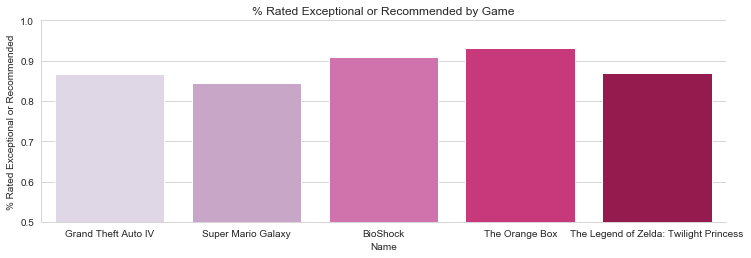

In [81]:
sb.catplot(x="Name",y="% Rated Exceptional or Recommended",data=rawgRatingsDF,kind="bar",
           size=3.5,aspect=3,palette="PuRd").set(title="% Rated Exceptional or Recommended by Game",ylim=(.5,1))